# Contoh Studi Kasus - Dataset Gaji Pegawai di Kota San Francisco, US

Dataset: https://www.kaggle.com/datasets/kaggle/sf-salaries/

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Membaca dataset dan menyimpannya ke dalam variabel sfs_df
sfs_df = pd.read_csv("../datasets/02_Case_02_SF_Salaries.csv")

/var/folders/v6/zmyt_9xj0d7g8z7n0vv4prfh0000gn/T/ipykernel_90403/2804306837.py:2: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  sfs_df = pd.read_csv("../datasets/02_Case_02_SF_Salaries.csv")


## 1. 5 baris teratas dataset

In [3]:
sfs_df.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## 2. 5 baris terakhir dataset

In [4]:
sfs_df.tail(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


## 3. Dimensi (jumlah baris dan kolom) dataset


In [5]:
sfs_df.shape

(148654, 13)

In [6]:
print(f"Jumlah baris: {sfs_df.shape[0]}")
print(f"Jumlah kolom: {sfs_df.shape[1]}")

Jumlah baris: 148654
Jumlah kolom: 13


## 4. Informasi singkat dataset (jumlah baris, kolom, tipe data setiap kolom dan penggunaan memori)

In [7]:
sfs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


## 5. Menampilkan jumlah data kosong (null) dalam dataset

In [8]:
sfs_df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

## 6. Membuang kolom Id, Notes, Agency, dan Status

In [9]:
sfs_df = sfs_df.drop(['Id', 'Notes', 'Agency', 'Status'], axis=1)
# axis=1 digunakan untuk menghapus kolom
# axis=0 digunakan untuk menghapus baris

In [10]:
sfs_df.head(3)
# Terlihat bahwa kolom Id, Notes, Agency, dan Status sudah terhapus

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011


## 7. Menampilkan statistik deskriptif umum dari dataset

In [11]:
sfs_df.describe(include='all')

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654,148654,148049.0,148654.0,148654.0,112495.0,148654.000000,148654.000000,148654.000000
unique,110811,2159,109900.0,66555.0,84968.0,99635.0,NaN,NaN,NaN
top,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,NaN,NaN,NaN
freq,13,7036,875.0,66103.0,35218.0,1053.0,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,74768.321972,93692.554811,2012.522643
std,NaN,NaN,NaN,NaN,NaN,NaN,50517.005274,62793.533483,1.117538
min,NaN,NaN,NaN,NaN,NaN,NaN,-618.130000,-618.130000,2011.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,36168.995000,44065.650000,2012.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,71426.610000,92404.090000,2013.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,105839.135000,132876.450000,2014.000000


## 8. Menampilkan 5 nama pegawai yang sering muncul dalam dataset

In [12]:
sfs_df['EmployeeName'].value_counts().head()

EmployeeName
Kevin Lee       13
Richard Lee     11
Steven Lee      11
William Wong    11
Stanley Lee      9
Name: count, dtype: int64

## 9. Jumlah nama pekerjaan/jabatan

In [13]:
sfs_df['JobTitle'].nunique()

2159

## 10. Total nama pekerjaan/jabatan yang berisi kata 'Captain'

In [14]:
# Mencari jumlah menggunakan fungsi len()
len(sfs_df[sfs_df['JobTitle'].str.contains("CAPTAIN", case=False)])

552

In [15]:
# Menggunakan fungsi value_counts()
sfs_df['JobTitle'].str.contains("CAPTAIN", case=False).value_counts()

JobTitle
False    148102
True        552
Name: count, dtype: int64

In [16]:
# Menggunakan fungsi count()
sfs_df[sfs_df['JobTitle'].str.contains("CAPTAIN", case=False)].count()

EmployeeName        552
JobTitle            552
BasePay             551
OvertimePay         552
OtherPay            552
Benefits            411
TotalPay            552
TotalPayBenefits    552
Year                552
dtype: int64

## 11. Menampilkan jumlah pegawai departemen pemadam kebakaran ('fire')

In [17]:
# Tampilkan nama-nama kolom
sfs_df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [18]:
sfs_df[sfs_df['JobTitle'].str.contains('fire', case=False)]['EmployeeName']
# Gunakan case=False untuk mengabaikan huruf kapital (caps)

4            PATRICK GARDNER
6                  ALSON LEE
8             MICHAEL MORRIS
9         JOANNE HAYES-WHITE
10             ARTHUR KENNEY
                 ...        
145956      Kenneth C Farris
147556         Edward A Dunn
148021        Kari A Johnson
148209          Sheryl K Lee
148554       Lawrence F Gatt
Name: EmployeeName, Length: 5879, dtype: object

Ada 5879 pegawai di departemen pemadam kebakaran

## 12. Mengganti rekor 'Not provided' menjadi NaN

In [19]:
sfs_df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [21]:
# Cek
sfs_df[sfs_df[['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']] == 'Not provided']

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
148649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148650,Not provided,Not provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148651,Not provided,Not provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148652,Not provided,Not provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# sfs_df['EmployeeName'] = sfs_df['EmployeeName'].replace('Not Provided', np.nan)

In [ ]:
# Mengganti semua rekor 'Not Provided' pada semua kolom menjadi NaN
sfs_df[['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']] \
    = sfs_df[['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']].replace('Not Provided', np.nan)

In [ ]:
# Mengganti semua rekor 'Not provided' pada semua kolom menjadi NaN
sfs_df[['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']] \
    = sfs_df[['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']].replace('Not provided', np.nan)

In [23]:
# Bisa juga menggunakan teknik
sfs_df.replace('Not Provided', np.nan, inplace=True)
sfs_df.replace('Not provided', np.nan, inplace=True)

In [24]:
sfs_df.head(5)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011


## 13. Menghapus baris yang memiliki data kosong (NaN, null) atau missing values

In [ ]:
# sfs_df.drop(sfs_df[sfs_df.isnull().sum(axis=1) == 1].index, axis=0, inplace=True)

In [25]:
sfs_df.dropna(inplace=True)

In [26]:
# Tampilkan jumlah missing values setelah dihapus sebelumnya
sfs_df.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [27]:
# Persentase jumlah missing values
sfs_df.isna().sum() / len(sfs_df) * 100

EmployeeName        0.0
JobTitle            0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
dtype: float64

In [28]:
# Deskripsikan
sfs_df.describe()

,TotalPay,TotalPayBenefits,Year
count,111885.000000,111885.000000,111885.000000
mean,76128.458894,101242.688018,2013.012102
std,51269.799273,65248.943861,0.818018
min,-618.130000,-618.130000,2012.000000
25%,37041.130000,49674.510000,2012.000000
50%,72628.700000,101965.160000,2013.000000
75%,107526.200000,142988.060000,2014.000000
max,471952.640000,510732.680000,2014.000000


In [29]:
sfs_df.isnull().sum(axis=1)

36159     0
36160     0
36161     0
36162     0
36163     0
         ..
148645    0
148647    0
148648    0
148649    0
148653    0
Length: 111885, dtype: int64

In [30]:
# Konversi tipe data string menjadi float untuk data pada kolom 'BasePay'
sfs_df['BasePay'] = [float(i) for i in sfs_df['BasePay']]

## 14. Gaji pokok terendah, tertinggi, dan rata-rata

In [31]:
# Tampilkan nama-nama kolom
sfs_df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [32]:
# Konversi tipe data string menjadi float untuk data pada kolom 'BasePay'
sfs_df['BasePay'] = sfs_df['BasePay'].astype('float')

In [33]:
# Deskripsikan
sfs_df['BasePay'].describe()

count    111885.000000
mean      67207.424457
std       43417.860367
min        -166.010000
25%       33644.350000
50%       65547.030000
75%       95229.030000
max      319275.010000
Name: BasePay, dtype: float64

## 15. Mencari nama pekerjaan/jabatan atas nama Albert Pardini

In [34]:
sfs_df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [35]:
sfs_df[sfs_df['EmployeeName'] == 'Albert Pardini']['JobTitle']

36519    Captain 3
Name: JobTitle, dtype: object

Jabatan Albert Pardini adalah 'Captain 3'

## 16. Penghasilan pertahun beserta tunjangan/bonus Albert Pardini (Take Home Pay) dalam Dollar Amerika

In [36]:
sfs_df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [39]:
sfs_df[sfs_df['EmployeeName'] == 'Albert Pardini']['TotalPayBenefits']

36519    253995.29
Name: TotalPayBenefits, dtype: float64

Jadi, total penghasilan per tahun Albert Pardini adalah $ 253995.29

## 17. Menampilkan nama pegawai dengan gaji pokok ('BasePay') tertinggi

In [40]:
sfs_df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [41]:
sfs_df[sfs_df['BasePay'].max() == sfs_df['BasePay']][['EmployeeName', 'JobTitle', 'BasePay']]

,EmployeeName,JobTitle,BasePay
72925,Gregory P Suhr,Chief of Police,319275.01


Pegawai dengan gaji pokok tertinggi adalah Gergory P Suhr dengan Jabatan 'Chief of Police' (Kepala Kepolisian) dengan jumlah $ 319275.01 per tahun

## 18. Rata-rata jumlah seluruh gaji pokok pegawai per tahun

In [42]:
sfs_df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [43]:
# Pastikan seluruh data di kolom 'Year' berupa integer
sfs_df['Year'] = [int(i) for i in sfs_df['Year']]

In [44]:
# Konversi data pada kolom 'BasePay' dan 'Year' menjadi format numerik
sfs_df['BasePay'] = pd.to_numeric(sfs_df['BasePay'])
sfs_df['Year'] = pd.to_numeric(sfs_df['Year'])

In [46]:
# Kemudian cek info dataset
sfs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111885 entries, 36159 to 148653
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      111885 non-null  object 
 1   JobTitle          111885 non-null  object 
 2   BasePay           111885 non-null  float64
 3   OvertimePay       111885 non-null  object 
 4   OtherPay          111885 non-null  object 
 5   Benefits          111885 non-null  object 
 6   TotalPay          111885 non-null  float64
 7   TotalPayBenefits  111885 non-null  float64
 8   Year              111885 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 8.5+ MB


Perhatikan bahwa tipe data pada kolom 'BasePay' telah menjadi 'float64'

In [47]:
# Kemudian kelompokkan gaji pokok (BasePay) berdasarkan tahun
sfs_df['BasePay'].groupby([sfs_df['Year']]).mean()

# Atau boleh juga menggunakan metode: (hilangkan tanda pagar)
# sfs_df.groupby('Year')['BasePay'].mean()

Year
2012    65435.950986
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

## 19. Rata-rata gaji pokok pegawai berdasarkan jabatan ('JobTitle')

In [48]:
sfs_df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [49]:
# sfs_df.groupby('JobTitle').mean()['BasePay']
sfs_df['BasePay'].groupby([sfs_df['JobTitle']]).mean()

JobTitle
ACPO,JuvP, Juv Prob (SFERS)       62290.780000
ASR Senior Office Specialist      60551.580167
ASR-Office Assistant              41253.471951
Account Clerk                     42372.579396
Accountant I                      61777.832500
                                      ...     
Wire Rope Cable Maint Sprv        92751.746667
Worker's Comp Supervisor 1        68867.296429
Worker's Compensation Adjuster    72363.278784
X-Ray Laboratory Aide             46086.387100
Youth Comm Advisor                39077.957500
Name: BasePay, Length: 1109, dtype: float64

## 20. Rata-rata gaji pegawai dengan jabatan/profesi akuntan (Accountant)

In [53]:
sfs_df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [52]:
sfs_df[sfs_df['JobTitle'].str.contains('Accountant', case=False)]['BasePay'].mean()
# Gunakan argumen case=False untuk mengabaikan huruf kapital pada string 'Accountant'

75336.18288798921

Jadi, rata-rata gaji pegawai dengan jabatan/profesi akuntan (Accountant) adalah $ 75336.18288798921

## 21. 5 jabatan/profesi paling umum

In [54]:
sfs_df['JobTitle'].value_counts().head()

JobTitle
Transit Operator                6975
Special Nurse                   4382
Registered Nurse                3725
Public Svc Aide-Public Works    2514
Police Officer 3                2411
Name: count, dtype: int64

Tampilkan ke dalam grafik/plot

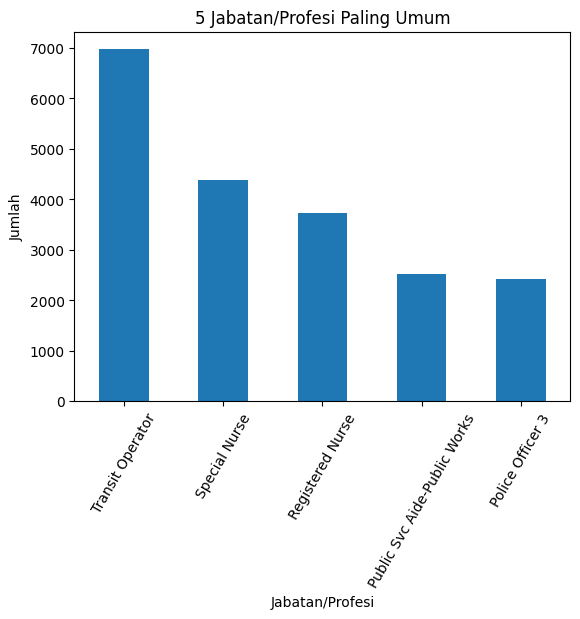

In [62]:
job_titles = sfs_df['JobTitle'].value_counts().head()

# Plot
job_titles.plot.bar(x='JobTitle', y='count')

# Atur judul dan label grafik/plot
plt.title('5 Jabatan/Profesi Paling Umum')
plt.xlabel('Jabatan/Profesi')
plt.xticks(rotation=60)
plt.ylabel('Jumlah')

# Tampilkan plot
plt.show()